# Лр№4: Классификация изображений пассажиров 

## Загрузка и подготовка изображений

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
data_dir = r'C:/Users/radmi/Desktop/jupyter notebook/bus_data'

img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 7265 images belonging to 2 classes.
Found 1816 images belonging to 2 classes.


## Архитектура сверточной нейросети

In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\radmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Обучение модели

In [4]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


C:\Users\radmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 83s 358ms/step - accuracy: 0.7486 - loss: 0.5897 - val_accuracy: 0.6955 - val_loss: 0.6449
Epoch 2/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.8727 - loss: 0.2961 - val_accuracy: 0.6068 - val_loss: 0.7287
Epoch 3/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9075 - loss: 0.2103 - val_accuracy: 0.6960 - val_loss: 0.7417
Epoch 4/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 32s 139ms/step - accuracy: 0.9317 - loss: 0.1609 - val_accuracy: 0.7577 - val_loss: 0.9543
Epoch 5/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.9556 - loss: 0.1103 - val_accuracy: 0.7439 - val_loss: 1.0080
Epoch 6/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 27s 119ms/step - accuracy: 0.9752 - loss: 0.0697 - val_accuracy: 0.7434 - val_loss: 1.4760
Epoch 7/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 29s 127ms/step - accuracy: 0.9709 - loss: 0.0734 - val_accuracy: 0.7461 - val_loss: 1.6526
Epoch 8/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 132ms/step - accuracy: 0.9703 - loss: 0

## Графики точности и функции потерь

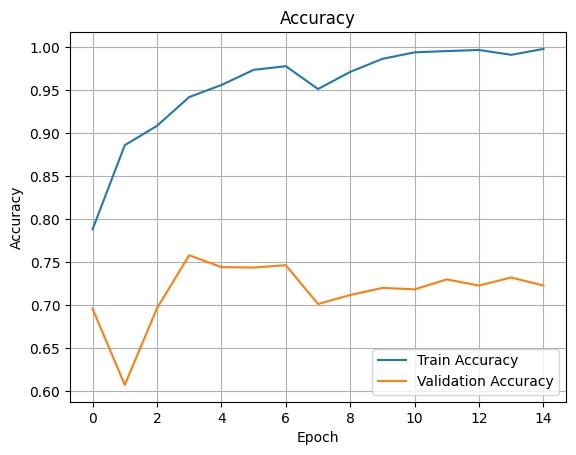

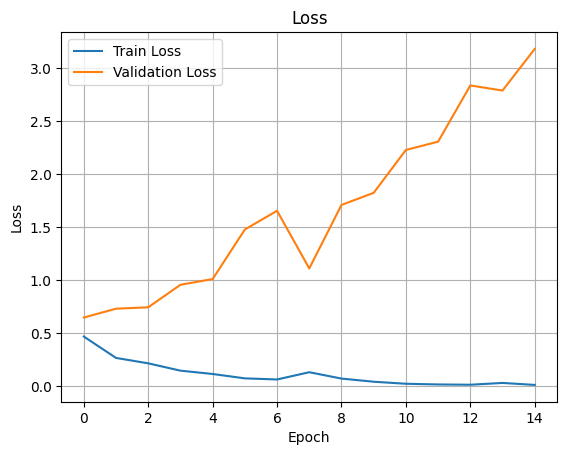

In [5]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
